In [1]:
import pandas as pd
import nltk
import re
from textblob import TextBlob
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing 
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install textblob 

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anjalisingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anjalisingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anjalisingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anjalisingh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
wn = nltk.WordNetLemmatizer()
stop = stopwords.words('english')

In [5]:
df = pd.read_excel('/Users/anjalisingh/Documents/Movie_Review/Use_TrainingData.xlsx')
df_hindi = pd.read_csv('/Users/anjalisingh/Documents/Movie_Review/TranslatedReviews.csv')

In [6]:
df

,Unnamed: 0,review,sentiment
0,0,One of the other reviewers has mentioned that ...,positive
1,1,A wonderful little production. <br /><br />The...,positive
2,2,I thought this was a wonderful way to spend ti...,positive
3,3,Basically there's a family where a little boy ...,negative
4,4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...,...
70995,70995,"o . k , so the acting is not up to par , but i...",negative
70996,70996,but what about the script ?,negative
70997,70997,"well , that's not up to par either .",negative
70998,70998,emmerich and screenwriting pal dean devlin see...,negative


In [7]:
df_hindi

,Unnamed: 0,sentiment,clean_review_sentence
0,0,1,attempt make film issue appreciated
1,1,1,weirdness
2,2,1,john abraham look good believable even action ...
3,3,0,friend may find end story tragic end death pro...
4,4,1,story cleverly lends appeal mood young mature ...
...,...,...,...
793,793,0,naked truth misuse strong column democracy
794,794,0,portrayal false
795,795,0,could connect audience hasina parkar
796,796,0,hand film based oriya background current spice...


In [8]:
df_hindi = df_hindi.drop(columns = ['Unnamed: 0'])

In [9]:
df = df.drop(columns = ['Unnamed: 0'])
df['sentiment'] = df['sentiment'].where(df['sentiment'] == 'negative').replace('negative',0)
df['sentiment'].fillna('None', inplace=True)
df['sentiment'] = df['sentiment'].replace('None',1)

In [10]:
df_hindi

,sentiment,clean_review_sentence
0,1,attempt make film issue appreciated
1,1,weirdness
2,1,john abraham look good believable even action ...
3,0,friend may find end story tragic end death pro...
4,1,story cleverly lends appeal mood young mature ...
...,...,...
793,0,naked truth misuse strong column democracy
794,0,portrayal false
795,0,could connect audience hasina parkar
796,0,hand film based oriya background current spice...


In [11]:
df_hindi.isnull().sum()

sentiment                0
clean_review_sentence    1
dtype: int64

In [12]:
df_hindi['clean_review_sentence'].index[df_hindi['clean_review_sentence'].isnull()]

Int64Index([221], dtype='int64')

In [13]:
df_hindi = df_hindi.drop(df.index[221], axis=0)

In [14]:
df_hindi

,sentiment,clean_review_sentence
0,1,attempt make film issue appreciated
1,1,weirdness
2,1,john abraham look good believable even action ...
3,0,friend may find end story tragic end death pro...
4,1,story cleverly lends appeal mood young mature ...
...,...,...
793,0,naked truth misuse strong column democracy
794,0,portrayal false
795,0,could connect audience hasina parkar
796,0,hand film based oriya background current spice...


# Explore Dataset

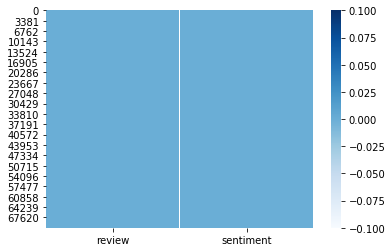

In [15]:
 sns.heatmap(df.isnull(), cbar = True, cmap ='Blues')

BINS-->Number of histogram bins to be used.
A histogram displays numerical data by grouping data into "bins" of equal width. Each bin is plotted as a bar whose height corresponds to how many data points are in that bin. Bins are also sometimes called "intervals", "classes", or "buckets".
figsize(horizontal, vertical)

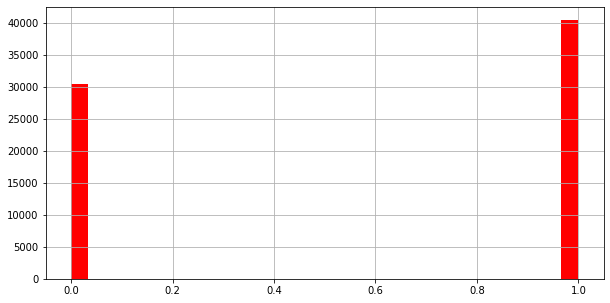

In [16]:
df['sentiment'].hist(bins=30, figsize = (10,5), color='r')

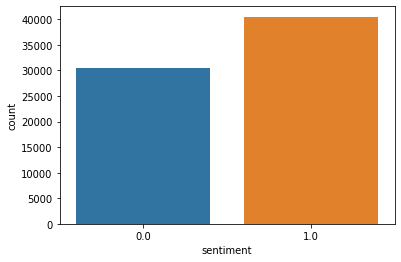

In [17]:
sns.countplot(x="sentiment", data=df)

In [18]:
df['length'] = df['review'].apply(lambda x: len(x))

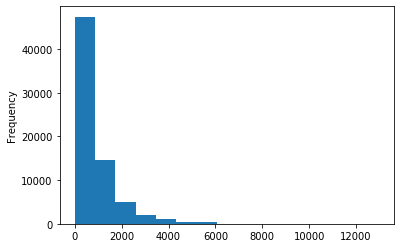

In [19]:
df['length'].plot(bins=15, kind='hist')

In [20]:
df.describe()

,sentiment,length
count,71000.000000,71000.000000
mean,0.570775,808.187901
std,0.494969,955.503133
min,0.000000,1.000000
25%,0.000000,125.000000
50%,1.000000,592.000000
75%,1.000000,1083.000000
max,1.000000,12988.000000


In [21]:
# from bs4 import BeautifulSoup
# #Function for removing html
# def html(text):
#     return BeautifulSoup(text, "lxml").text
# # Passing the function to 'text_rare'
# df['review_no_tags'] = df['review'].apply(lambda x: html(x))

In [22]:
# df['review_no_tags']

In [23]:
# Function for url's
# def remove_urls(text):
#     url_pattern = re.compile(r'https?://\S+|www\.\S+')
#     return url_pattern.sub(r'', text)
# df['review_no_tags'] = df['review_no_tags'].apply(lambda x: remove_urls(x))

In [24]:
# Removal of 10 rare words and store into new column called 'text_rare'
# freq = pd.Series(' '.join(df['review_no_tags']).split()).value_counts()[-1000:]
# freq = list(freq.index)
# df['text_rare'] = df['review_no_tags'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
# df['text_rare'].head()

In [25]:
# def clean_text_list(txt):
#   no_punct = "".join([c for c in txt if c not in string.punctuation])
#   tokens = re.split('\W+',txt)
#   txt = [wn.lemmatize(word) for word in tokens if word not in stop]
#   return txt

In [26]:
def clean_text_sentence(txt):
  no_punct = "".join([c for c in txt if c not in string.punctuation])
  tokens = re.split('\W+',txt)
  txt = " ".join([wn.lemmatize(word) for word in tokens if word not in stop])
  return txt

In [27]:
#df['clean_review_list'] = df['review'].apply(lambda x: clean_text_list(x))

In [28]:
df['clean_review_sentence'] = df['review'].apply(lambda x: clean_text_sentence(x))

In [29]:
df

,review,sentiment,length,clean_review_sentence
0,One of the other reviewers has mentioned that ...,1.0,1761,One reviewer mentioned watching 1 Oz episode h...
1,A wonderful little production. <br /><br />The...,1.0,998,A wonderful little production br br The filmin...
2,I thought this was a wonderful way to spend ti...,1.0,926,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,0.0,748,Basically family little boy Jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1.0,1317,Petter Mattei Love Time Money visually stunnin...
...,...,...,...,...
70995,"o . k , so the acting is not up to par , but i...",0.0,74,k acting par never movie
70996,but what about the script ?,0.0,27,script
70997,"well , that's not up to par either .",0.0,36,well par either
70998,emmerich and screenwriting pal dean devlin see...,0.0,130,emmerich screenwriting pal dean devlin seem ca...


In [30]:
# from textblob import TextBlob
# df['clean_review_sentence'][:5].apply(lambda x: str(TextBlob(x).correct()))

In [31]:
df['clean_review_sentence'] = df['clean_review_sentence'].apply(lambda x: x.replace('br',''))

In [32]:
X_train = df['clean_review_sentence']

In [33]:
y_train = df['sentiment']

In [34]:
X_test = df_hindi['clean_review_sentence']

In [35]:
y_test = df_hindi['sentiment']

In [36]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((71000,), (71000,), (797,), (797,))

In [37]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Count Vectorizer

In [38]:
vectorizer = CountVectorizer(analyzer = clean_text_sentence)
#vectorizer.get_feature_name
X_train_feat = vectorizer.fit_transform(X_train).toarray()
X_test_feat = vectorizer.transform(X_test).toarray()
print(X_train_feat)
print(X_test_feat)

[[177   0   1 ...   0   0   0]
 [ 93   0   0 ...   0   0   0]
 [ 95   0   0 ...   0   0   0]
 ...
 [  3   0   0 ...   0   0   0]
 [ 14   0   0 ...   0   0   0]
 [ 18   0   0 ...   0   0   0]]
[[ 4  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 7  0  0 ...  0  0  0]
 ...
 [ 4  0  0 ...  0  0  0]
 [10  0  0 ...  0  0  0]
 [ 5  0  0 ...  0  0  0]]


In [39]:
X_train_feat.shape, X_test_feat.shape

((71000, 129), (797, 129))

## Random Forest

n_estimator = number of trees in the forest


In [40]:
classifier_rfc = RandomForestClassifier(n_estimators = 500, random_state=0)
classifier_rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [41]:
classifier_rfc.fit(X_train_feat, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [42]:
predictions_rfc = classifier_rfc.predict(X_test_feat)
predictions_rfc

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1.

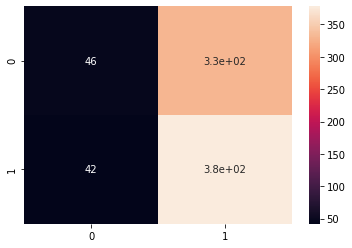

In [43]:
cm = confusion_matrix(y_test, predictions_rfc)
sns.heatmap(cm, annot=True)

In [44]:
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.52      0.12      0.20       377
           1       0.53      0.90      0.67       420

    accuracy                           0.53       797
   macro avg       0.53      0.51      0.43       797
weighted avg       0.53      0.53      0.45       797



In [45]:
accuracy_score(y_test, predictions_rfc)

0.5319949811794228

In [46]:
regressor_rfr = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rfr

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [47]:
regressor_rfr.fit(X_train_feat, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [48]:
predictions_rfr = regressor_rfr.predict(X_test_feat)
predictions_rfr

array([0.567     , 0.57941718, 0.616     , 0.67933333, 0.806     ,
       0.55366667, 0.61      , 0.566     , 0.66      , 0.584     ,
       0.466     , 0.718     , 0.483     , 0.62      , 0.708     ,
       0.40611111, 0.42112857, 0.638     , 0.655     , 0.702     ,
       0.684     , 0.598     , 0.684     , 0.72      , 0.602     ,
       0.576     , 0.5772    , 0.636     , 0.63      , 0.616     ,
       0.53473333, 0.702     , 0.6404254 , 0.612     , 0.65      ,
       0.46980303, 0.594     , 0.674     , 0.61      , 0.666     ,
       0.584     , 0.56      , 0.678     , 0.444     , 0.686     ,
       0.554     , 0.682     , 0.552     , 0.57200606, 0.57488889,
       0.688     , 0.694     , 0.638     , 0.58275   , 0.56      ,
       0.594     , 0.57266667, 0.638     , 0.53266667, 0.634     ,
       0.706     , 0.516     , 0.62      , 0.698     , 0.626     ,
       0.53      , 0.57      , 0.5983    , 0.624     , 0.664     ,
       0.676     , 0.642     , 0.644     , 0.626     , 0.756  

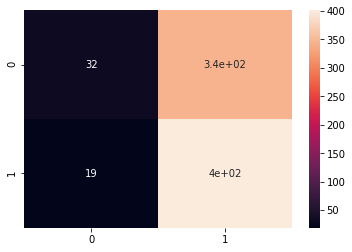

In [49]:
cm = confusion_matrix(y_test, predictions_rfr.round())
sns.heatmap(cm, annot=True)

In [50]:
accuracy_score(y_test, predictions_rfr.round())

0.5432873274780426

In [51]:
print(classification_report(y_test,predictions_rfr.round()))

              precision    recall  f1-score   support

           0       0.63      0.08      0.15       377
           1       0.54      0.95      0.69       420

    accuracy                           0.54       797
   macro avg       0.58      0.52      0.42       797
weighted avg       0.58      0.54      0.43       797



## Naive Bayes

In [52]:
NB_classifier_cv = MultinomialNB()
NB_classifier_cv

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [53]:
NB_classifier_cv.fit(X_train_feat, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:
predictions_nb = NB_classifier_cv.predict(X_test_feat)
predictions_nb

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

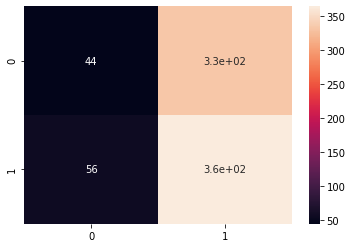

In [55]:
cm = confusion_matrix(y_test, predictions_nb)
sns.heatmap(cm, annot=True)

In [56]:
accuracy_score(y_test, predictions_nb)

0.5119196988707654

In [57]:
print(classification_report(y_test, predictions_nb ))

              precision    recall  f1-score   support

           0       0.44      0.12      0.18       377
           1       0.52      0.87      0.65       420

    accuracy                           0.51       797
   macro avg       0.48      0.49      0.42       797
weighted avg       0.48      0.51      0.43       797



In [58]:
gnb = GaussianNB()
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
gnb.fit(X_train_feat, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
p = gnb.predict(X_test_feat)
p

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

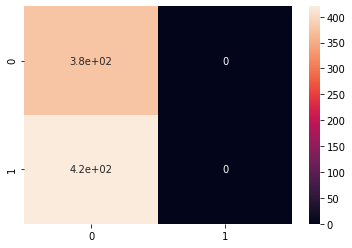

In [61]:
cm = confusion_matrix(y_test, p)
sns.heatmap(cm, annot=True)

In [62]:
accuracy_score(y_test, p)

0.4730238393977415

In [63]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64       377
           1       0.00      0.00      0.00       420

    accuracy                           0.47       797
   macro avg       0.24      0.50      0.32       797
weighted avg       0.22      0.47      0.30       797



/Users/anjalisingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# #Logistic Regression

In [64]:
logmodel_cv = LogisticRegression()
logmodel_cv.fit(X_train_feat, y_train)
predictions_lr = logmodel_cv.predict(X_test_feat)
predictions_lr

/Users/anjalisingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

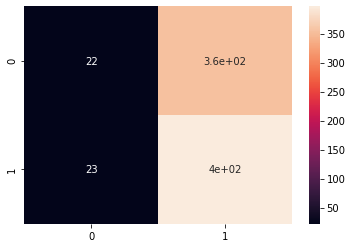

In [65]:
cm = confusion_matrix(y_test, predictions_lr)
sns.heatmap(cm, annot=True)

In [66]:
accuracy_score(y_test, predictions_lr)

0.5257214554579673

In [67]:
print(classification_report(y_test,predictions_lr))

              precision    recall  f1-score   support

           0       0.49      0.06      0.10       377
           1       0.53      0.95      0.68       420

    accuracy                           0.53       797
   macro avg       0.51      0.50      0.39       797
weighted avg       0.51      0.53      0.41       797



# #KNeighborsClassifier

In [68]:
neigh_cv = KNeighborsClassifier(n_neighbors=7)
neigh_cv

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [69]:
neigh_cv.fit(X_train_feat, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [70]:
predictions_KNN_cv = neigh_cv.predict(X_test_feat)
predictions_KNN_cv

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0.

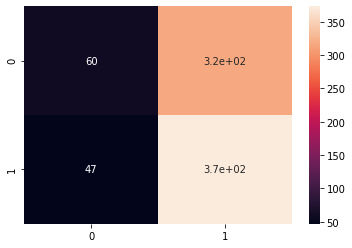

In [71]:
cm = confusion_matrix(y_test, predictions_KNN_cv)
sns.heatmap(cm, annot=True)

In [72]:
accuracy_score(y_test,predictions_KNN_cv)

0.5432873274780426

In [73]:
print(classification_report(y_test,predictions_KNN_cv))

              precision    recall  f1-score   support

           0       0.56      0.16      0.25       377
           1       0.54      0.89      0.67       420

    accuracy                           0.54       797
   macro avg       0.55      0.52      0.46       797
weighted avg       0.55      0.54      0.47       797



# TF-IDF

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer = clean_text_sentence)
X_train_feat_tfidf = tfidf_vect.fit_transform(X_train).toarray()
X_test_feat_tfidf = tfidf_vect.transform(X_test).toarray()
print(X_train_feat_tfidf) 
print(X_test_feat_tfidf)

[[0.59972839 0.         0.00837001 ... 0.         0.         0.        ]
 [0.52265305 0.         0.         ... 0.         0.         0.        ]
 [0.58933807 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.51468295 0.         0.         ... 0.         0.         0.        ]
 [0.52119914 0.         0.         ... 0.         0.         0.        ]
 [0.52637164 0.         0.         ... 0.         0.         0.        ]]
[[0.36503074 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.43541643 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.37022407 0.         0.         ... 0.         0.         0.        ]
 [0.49274301 0.         0.         ... 0.         0.         0.        ]
 [0.44999666 0.         0.         ... 0.         0.         0.        ]]


In [75]:
X_train_feat_tfidf.shape, X_test_feat_tfidf.shape

((71000, 129), (797, 129))

# #Random Forest

In [76]:
classifier_tfidf = RandomForestClassifier(n_estimators = 50, random_state = 0)
classifier_tfidf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [77]:
classifier_tfidf.fit(X_train_feat_tfidf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [78]:
predictions_rfr_tfidf = classifier_tfidf.predict(X_test_feat_tfidf)
predictions_rfr_tfidf

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

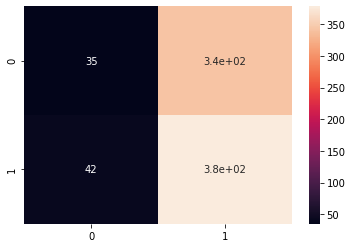

In [79]:
cm = confusion_matrix(y_test, predictions_rfr_tfidf)
sns.heatmap(cm, annot=True)

In [80]:
accuracy_score(y_test, predictions_rfr_tfidf)

0.5181932245922208

In [81]:
print(classification_report(y_test,predictions_rfr_tfidf))

              precision    recall  f1-score   support

           0       0.45      0.09      0.15       377
           1       0.53      0.90      0.66       420

    accuracy                           0.52       797
   macro avg       0.49      0.50      0.41       797
weighted avg       0.49      0.52      0.42       797



In [82]:
classifier_rfr_tfidf = RandomForestRegressor(n_estimators = 50, random_state = 0)
classifier_rfr_tfidf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [83]:
classifier_rfr_tfidf.fit(X_train_feat_tfidf, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [84]:
predictions_rfr_tfidf = classifier_tfidf.predict(X_test_feat_tfidf)
predictions_rfr_tfidf

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

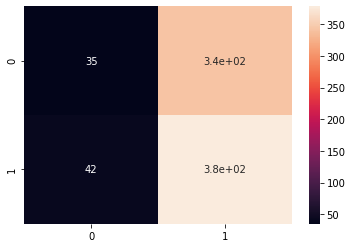

In [85]:
cm = confusion_matrix(y_test, predictions_rfr_tfidf)
sns.heatmap(cm, annot=True)

In [86]:
accuracy_score(y_test, predictions_rfr_tfidf)

0.5181932245922208

In [87]:
print(classification_report(y_test,predictions_rfr_tfidf))

              precision    recall  f1-score   support

           0       0.45      0.09      0.15       377
           1       0.53      0.90      0.66       420

    accuracy                           0.52       797
   macro avg       0.49      0.50      0.41       797
weighted avg       0.49      0.52      0.42       797



# #Naive Bayes

In [88]:
NB_classifier_tfidf = MultinomialNB()
NB_classifier_tfidf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [89]:
NB_classifier_tfidf.fit(X_train_feat_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [90]:
predictions_nb = NB_classifier_tfidf.predict(X_test_feat_tfidf)
predictions_nb

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

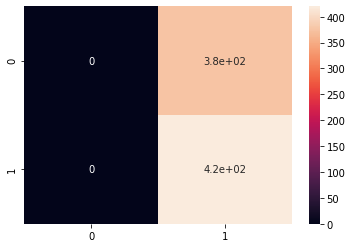

In [91]:
cm = confusion_matrix(y_test, predictions_nb)
sns.heatmap(cm, annot=True)

In [92]:
accuracy_score(y_test, predictions_nb)

0.5269761606022585

In [93]:
print(classification_report(y_test,predictions_nb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       377
           1       0.53      1.00      0.69       420

    accuracy                           0.53       797
   macro avg       0.26      0.50      0.35       797
weighted avg       0.28      0.53      0.36       797



/Users/anjalisingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
gnb_tfidf = GaussianNB()
gnb_tfidf

GaussianNB(priors=None, var_smoothing=1e-09)

In [95]:
gnb_tfidf.fit(X_train_feat_tfidf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [96]:
predictions_tfidf = gnb_tfidf.predict(X_test_feat_tfidf)
predictions_tfidf

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

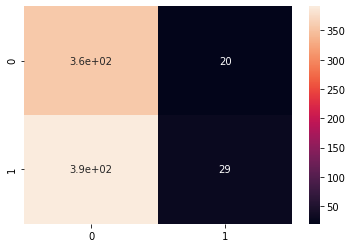

In [97]:
cm = confusion_matrix(y_test, predictions_tfidf)
sns.heatmap(cm, annot=True)

In [98]:
accuracy_score(y_test, predictions_tfidf)

0.48431618569636137

In [99]:
print(classification_report(y_test,predictions_tfidf))

              precision    recall  f1-score   support

           0       0.48      0.95      0.63       377
           1       0.59      0.07      0.12       420

    accuracy                           0.48       797
   macro avg       0.53      0.51      0.38       797
weighted avg       0.54      0.48      0.37       797



# #LogisticRegression

In [100]:
logmodel = LogisticRegression()
logmodel.fit(X_train_feat_tfidf, y_train)
predictions = logmodel.predict(X_test_feat_tfidf)
predictions

/Users/anjalisingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

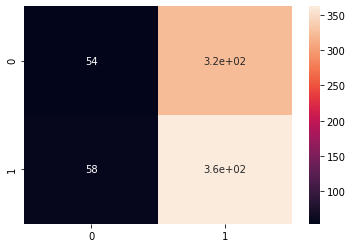

In [101]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

In [102]:
accuracy_score(y_test, predictions)

0.5219573400250941

In [103]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.48      0.14      0.22       377
           1       0.53      0.86      0.66       420

    accuracy                           0.52       797
   macro avg       0.51      0.50      0.44       797
weighted avg       0.51      0.52      0.45       797



# #KNeighborsClassifier

In [104]:
neigh_tfidf = KNeighborsClassifier(n_neighbors=10)
neigh_tfidf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [105]:
neigh_tfidf.fit(X_train_feat_tfidf, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [106]:
predictions_KNN_tfidf = neigh_tfidf.predict(X_test_feat_tfidf)
predictions_KNN_tfidf

array([0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1.

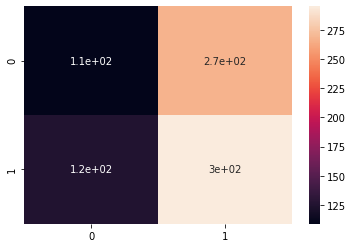

In [107]:
cm = confusion_matrix(y_test, predictions_KNN_tfidf)
sns.heatmap(cm, annot=True)

In [108]:
accuracy_score(y_test, predictions_KNN_tfidf)

0.506900878293601

In [109]:
print(classification_report(y_test,predictions_KNN_tfidf))

              precision    recall  f1-score   support

           0       0.47      0.29      0.36       377
           1       0.52      0.70      0.60       420

    accuracy                           0.51       797
   macro avg       0.49      0.50      0.48       797
weighted avg       0.50      0.51      0.49       797

